In [15]:
def integer_convert(input: str):
    output = 0
    try:
        output = int(input)
    except:
        print('Validation: Please enter only numbers')
    return output


def text_processing(input: str):
    ascii_value = 0
    caesar_mapping = 65 # In Caesar is 0 but in ASCII is 65
    output = ""
    for character in input:
        ascii_value = ord(character)        
        if ascii_value < (0 + caesar_mapping) or ascii_value > (25 + caesar_mapping):
            #print('Validation: Deleting letter: ',character)
            continue
        output = output + character
    return output


def playfair_matrix(key: str):
    alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O',
                'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

    max_col = 4  # Start in 0 to 4 columns
    matrix_key = [[], [], [], [], []]
    col = 0
    row = 0
    for character in key:
        matrix_key[row].append(character)
        if col >= max_col:
            col = 0
            row = row + 1
        else:
            col = col + 1
    for character in alphabet:
        if any(character in sublist for sublist in matrix_key):
            continue
        matrix_key[row].append(character)
        if col >= max_col:
            col = 0
            row = row + 1
        else:
            col = col + 1
    return matrix_key


def playfair_encryption(plain_text: str, matrix_key):
    ciphertext = ""
    character_encrypted = ""

    # Re-group
    count_col = 0
    count_row = 0
    max_col = 1
    plain_text_group = []
    for character in plain_text:
        if count_col < max_col:
            plain_text_group.append([character])
            count_col = count_col + 1
        else:
            if plain_text_group[count_row][0] == character:
                plain_text_group[count_row].append('X')
                plain_text_group.append([character])
            else:
                plain_text_group[count_row].append(character)
                count_col = 0
            count_row = count_row + 1
    if len(plain_text_group[-1]) < 2:
        plain_text_group[-1].append('X')

    #Cipher
    count_find = 0
    for characters in plain_text_group:
        ch1 = characters[0]
        ch1_r = 0
        ch1_c = 0
        ch2 = characters[1]
        ch2_r = 0
        ch2_c = 0
        count_row = 0
        for row in matrix_key:
            if ch1 in row:
                ch1_r = count_row
                ch1_c = row.index(ch1)
                count_find = count_find + 1

            if ch2 in row:
                ch2_r = count_row
                ch2_c = row.index(ch2)
                count_find = count_find + 1

            if count_find == 2:
                count_find = 0
                break
            count_row = count_row + 1

        if ch1_r == ch2_r:
            ciphertext = ciphertext + matrix_key[ch1_r][(ch1_c + 1) % 5]
            ciphertext = ciphertext + matrix_key[ch2_r][(ch2_c + 1) % 5]
        elif ch1_c == ch2_c:
            ciphertext = ciphertext + matrix_key[(ch1_r + 1) % 5][ch1_c]
            ciphertext = ciphertext + matrix_key[(ch2_r + 1) % 5][ch2_c]
        else:
            ciphertext = ciphertext + matrix_key[ch1_r][ch2_c]
            ciphertext = ciphertext + matrix_key[ch2_r][ch1_c]

    return ciphertext


def playfair_decryption(ciphertext: str, matrix_key):
    plain_text = ""
    character_encrypted = ""

    # Re-group
    count_col = 0
    count_row = 0
    max_col = 1
    ciphertext_group = []
    for character in ciphertext:
        if count_col < max_col:
            ciphertext_group.append([character])
            count_col = count_col + 1
        else:
            ciphertext_group[count_row].append(character)
            count_col = 0
            count_row = count_row + 1

    #Cipher
    count_find = 0
    for characters in ciphertext_group:
        ch1 = characters[0]
        ch1_r = 0
        ch1_c = 0
        ch2 = characters[1]
        ch2_r = 0
        ch2_c = 0
        count_row = 0
        for row in matrix_key:
            if ch1 in row:
                ch1_r = count_row
                ch1_c = row.index(ch1)
                count_find = count_find + 1

            if ch2 in row:
                ch2_r = count_row
                ch2_c = row.index(ch2)
                count_find = count_find + 1

            if count_find == 2:
                count_find = 0
                break
            count_row = count_row + 1

        if ch1_r == ch2_r:
            plain_text = plain_text + matrix_key[ch1_r][(ch1_c - 1) % 5]
            plain_text = plain_text + matrix_key[ch2_r][(ch2_c - 1) % 5]
        elif ch1_c == ch2_c:
            plain_text = plain_text + matrix_key[(ch1_r - 1) % 5][ch1_c]
            plain_text = plain_text + matrix_key[(ch2_r - 1) % 5][ch2_c]
        else:
            plain_text = plain_text + matrix_key[ch1_r][ch2_c]
            plain_text = plain_text + matrix_key[ch2_r][ch1_c]

    # Delete X
    count_col = 0
    count_row = 0
    max_col = 1
    x_added = []
    for character in plain_text:
        if count_col >= max_col:
            if character == 'X':
                x_added.append(count_row)
            count_col = 0
        else:
            count_col = count_col + 1
        count_row = count_row + 1

    plain_text_final = ""
    for index in range(len(plain_text)):
        if index not in x_added:
            plain_text_final = plain_text_final + plain_text[index]

    return plain_text_final


def vigenere_encryption(plain_text: str, key: str):
    max_length_plain_text = len(plain_text)  # Max length of key and plain text
    max_length_key = len(key)
    ciphertext = ""  # Cipher text
    cipher_mapping = 65  # In Caesar is 0 but in ASCII is 65
    for i in range(max_length_plain_text):
        number_plain_character = ord(plain_text[i]) - cipher_mapping
        number_key_character = ord(key[i % max_length_key]) - cipher_mapping
        number_ciphertext = (number_plain_character + number_key_character) % 26
        ciphertext = ciphertext + chr(number_ciphertext + cipher_mapping)
    return ciphertext


def vigenere_decryption(ciphertext: str, key: str):
    max_length_ciphertext = len(ciphertext)  # Max length of key and plain text
    max_length_key = len(key)
    plain_text = ""  # Cipher text
    cipher_mapping = 65  # In Caesar is 0 but in ASCII is 65
    for i in range(max_length_ciphertext):
        number_ciphertext_character = ord(ciphertext[i]) - cipher_mapping
        number_key_character = ord(key[i % max_length_key]) - cipher_mapping
        number_plain_text = (number_ciphertext_character - number_key_character) % 26
        plain_text = plain_text + chr(number_plain_text + cipher_mapping)
    return plain_text


def frequency_calculation(ciphertext: str):
    frequency = dict()
    for character in ciphertext:
        if character in frequency.keys():
            frequency[character] = frequency[character] + 1
        else:
            frequency[character] =  1
    return frequency

In [11]:
# INTERFAZ TO PLAYFAIR CIPHER
#Imports
from matplotlib import pyplot as plt
# Principal function
# Options
EXIT = 9
#OPTIONS = [EXIT, WRITE_TEXT]
key = 3

option = 0
while(option != EXIT):
    option = input('Select one option: \n 1. Encryption \n 2. Decryption \n 3. Frequency \n 9. Exit \n')
    option = integer_convert(option)
    method = option
    if option == 0 or option == 9:
        continue
    
    option = input('Select one option: \n 1. Insert text by console \n 9. Exit \n')
    option = integer_convert(option)
    if option == 0 or option == 9:
        continue
    elif option == 1:        
        if method == 1: # Encryption
            plain_text = ""
            write_status = True
            option_write = 0
            
            # Validation processing
            while(option_write != EXIT): # Write text cycle
                plain_text = input('Write the plain text: \n')
                try:
                    plain_text = text_processing(plain_text)
                    break
                except:
                    option_write = input('Select one option: \n 1. Try again \n 9. Exit \n')
                    option_write = integer_convert(option_write)
                    if option_write == 0 | option_write == 9:
                        continue
            
            if option_write == 9:
                continue
            
            key = input('Insert key value to PlayFair: \n')
            key = playfair_matrix(key)
            # TODO: Validate Key max value 25
            
            ciphertext = playfair_encryption(plain_text, key)
            print('-----------------------------------')
            print('The ciphertext is: \n', ciphertext)
            print('-----------------------------------')
            
        elif method == 2: # Decryption
            ciphertext = ""
            write_status = True
            option_write = 0
            
            # Validation processing
            while(option_write != EXIT): # Write text cycle
                ciphertext = input('Write the ciphertext: \n')
                try:
                    ciphertext = text_processing(ciphertext)
                    break
                except:
                    option_write = input('Select one option: \n 1. Try again \n 9. Exit \n')
                    option_write = integer_convert(option_write)
                    if option_write == 0 | option_write == 9:
                        continue
            
            if option_write == 9:
                continue
            
            key = input('Insert key value to PlayFair: \n')
            key = playfair_matrix(key)
            
            # TODO: Validate Key max value 25
            
            plain_text = playfair_decryption(ciphertext, key)
            print('-----------------------------------')
            print('The plain text is: \n', plain_text)
            print('-----------------------------------')
            
        elif method == 3: # Frequency
            ciphertext = ""
            write_status = True
            option_write = 0
            
            ciphertext = input('Write the ciphertext: \n')
                
            frequency = frequency_calculation(ciphertext)
            frequency = frequency.items()
            x, y = zip(*frequency) 
            
            plt.bar(x, y)
            plt.xlabel('Letters')
            plt.ylabel('Frequency')
            plt.show()
    
    
    option = input('Select one option: \n 1. Continue \n 9. Exit \n')
    option = integer_convert(option)    
    
print('Script finished')

Select one option: 
 1. Encryption 
 2. Decryption 
 3. Frequency 
 9. Exit 
1
Select one option: 
 1. Insert text by console 
 9. Exit 
1
Write the plain text: 
HELLOWORLD
Insert key value to PlayFair: 
MAXFRESH
-----------------------------------
The ciphertext is: 
 BSIRGTVPCTIM
-----------------------------------
Select one option: 
 1. Continue 
 9. Exit 
1
Select one option: 
 1. Encryption 
 2. Decryption 
 3. Frequency 
 9. Exit 
2
Select one option: 
 1. Insert text by console 
 9. Exit 
1
Write the ciphertext: 
BSIRGTVPCTIM
Insert key value to PlayFair: 
MAXFRESH
-----------------------------------
The plain text is: 
 HELLOWORLD
-----------------------------------
Select one option: 
 1. Continue 
 9. Exit 
9
Script finished


Select one option: 
 1. Encryption 
 2. Decryption 
 3. Frequency 
 9. Exit 
3
Select one option: 
 1. Insert text by console 
 9. Exit 
1
Write the ciphertext: 
CIIC5018 / ICOM5018 Network Security and Cryptography  Project 2: Playfair Cipher and Vigenere Cipher  Overview   In this exercise, you will need to design and implement Playfair cipher and Vigenere cipher, and then compare the relative frequency of letters in the plaintext and cyphertext. The programming language is Python.  Document requirements  To work on the exercise, you will need to prepare three documents following the guidelines below.   1.	A design document a.	Cover page i.	It shall include the title of the document, your name, student ID, department and university information, etc. b.	Table of content c.	Section 1: The Playfair cipher (encryption and decryption) i.	The input of encryption is a plaintext and a key 1.	The plaintext must be the output of the procedure described in section 1 of Project 1 ii.	The return 

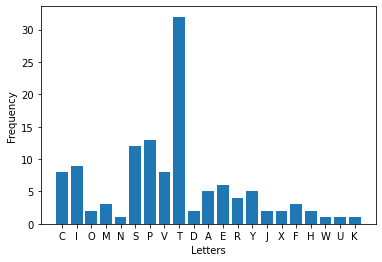

Select one option: 
 1. Continue 
 9. Exit 
1
Select one option: 
 1. Encryption 
 2. Decryption 
 3. Frequency 
 9. Exit 
3
Select one option: 
 1. Insert text by console 
 9. Exit 
1
Write the ciphertext: 
CIIC5018 / ICOM5018 NETWORK SECURITY AND CRYPTOGRAPHY  PROJECT 2: PLAYFAIR CIPHER AND VIGENERE CIPHER  OVERVIEW   IN THIS EXERCISE, YOU WILL NEED TO DESIGN AND IMPLEMENT PLAYFAIR CIPHER AND VIGENERE CIPHER, AND THEN COMPARE THE RELATIVE FREQUENCY OF LETTERS IN THE PLAINTEXT AND CYPHERTEXT. THE PROGRAMMING LANGUAGE IS PYTHON.  DOCUMENT REQUIREMENTS  TO WORK ON THE EXERCISE, YOU WILL NEED TO PREPARE THREE DOCUMENTS FOLLOWING THE GUIDELINES BELOW.   1.	A DESIGN DOCUMENT A.	COVER PAGE I.	IT SHALL INCLUDE THE TITLE OF THE DOCUMENT, YOUR NAME, STUDENT ID, DEPARTMENT AND UNIVERSITY INFORMATION, ETC. B.	TABLE OF CONTENT C.	SECTION 1: THE PLAYFAIR CIPHER (ENCRYPTION AND DECRYPTION) I.	THE INPUT OF ENCRYPTION IS A PLAINTEXT AND A KEY 1.	THE PLAINTEXT MUST BE THE OUTPUT OF THE PROCEDURE DESCR

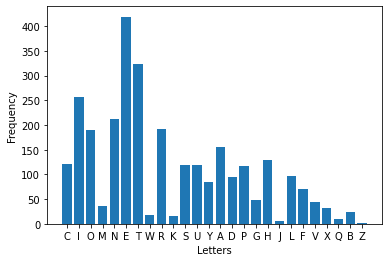

Select one option: 
 1. Continue 
 9. Exit 
9
Script finished


In [17]:
# INTERFAZ TO VIGENERE CIPHER
from matplotlib import pyplot as plt
# Principal function
# Options
EXIT = 9
#OPTIONS = [EXIT, WRITE_TEXT]
key = 3

option = 0
while(option != EXIT):
    option = input('Select one option: \n 1. Encryption \n 2. Decryption \n 3. Frequency \n 9. Exit \n')
    option = integer_convert(option)
    method = option
    if option == 0 or option == 9:
        continue
    
    option = input('Select one option: \n 1. Insert text by console \n 9. Exit \n')
    option = integer_convert(option)
    if option == 0 or option == 9:
        continue
    elif option == 1:        
        if method == 1: # Encryption
            plain_text = ""
            write_status = True
            option_write = 0
            
            # Validation processing
            plain_text = input('Write the plain text: \n')
            plain_text = text_processing(plain_text)
            print('Validated plain text: ', plain_text)
            
            key = input('Insert key value to Vigenere: \n')
            key = text_processing(key)
            print('Validated key: ', key)
            
            ciphertext = vigenere_encryption(plain_text, key)
            print('-----------------------------------')
            print('The ciphertext is: \n', ciphertext)
            print('-----------------------------------')
            
        elif method == 2: # Decryption
            ciphertext = ""
            write_status = True
            option_write = 0
            
            # Validation processing
            ciphertext = input('Write the ciphertext: \n')
            ciphertext = text_processing(ciphertext)
            print('Validated ciphertext: ', ciphertext)
            
            key = input('Insert key value to Vigenere: \n')
            key = text_processing(key)
            print('Validated key: ', key)
            
            plain_text = vigenere_decryption(ciphertext, key)
            print('-----------------------------------')
            print('The plain text is: \n', plain_text)
            print('-----------------------------------')
            
        elif method == 3: # Frequency
            ciphertext = ""
            write_status = True
            option_write = 0
            
            ciphertext = input('Write the ciphertext: \n')
            ciphertext = text_processing(ciphertext)
            print('-----------------------------------')
            print('Validated ciphertext: ', ciphertext)
            print('-----------------------------------')
            frequency = frequency_calculation(ciphertext)
            frequency = frequency.items()
            x, y = zip(*frequency) 
            
            plt.bar(x, y)
            plt.xlabel('Letters')
            plt.ylabel('Frequency')
            plt.show()
    
    
    option = input('Select one option: \n 1. Continue \n 9. Exit \n')
    option = integer_convert(option)    
    
print('Script finished')
    

In [ ]:
# UNIT TEST
#-------------------------------------------------------

def unit_test_decryption_first_letter():
    status = False
    ciphertext = 'AABCCD'
    frequency_expected = {"A": 2, "B": 1, "C": 2, "D": 1}
    frequency = frequency_calculation(ciphertext)
    if frequency_expected == frequency:
        status = True
    return status



# Call unit test
print("UT 1 - Encryption - First letter: ", unit_test_decryption_first_letter())